In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [70]:
experiments = [
    'mp_synth-v6_no-aug_synth', 'mp_synth-v6_no-aug_synth-noise',
    'mp_synth-v6_photo-aug_synth', 'mp_synth-v6_photo-aug_synth-noise',
    'harris_synth-v6', 'harris_synth-v6-noise',
    'shi_synth-v6', 'shi_synth-v6-noise',
    'fast_synth-v6', 'fast_synth-v6-noise',
]
confidence_thresholds = [0.1]*4 + [90000]*2 + [0.06]*2 + [40]*2

# PR curve

> mp_synth-v6_no-aug_synth
mAP: 0.9709157232956276
> mp_synth-v6_no-aug_synth-noise
mAP: 0.03422493639894289
> mp_synth-v6_photo-aug_synth
mAP: 0.9714723516241182
> mp_synth-v6_photo-aug_synth-noise
mAP: 0.9198998933929101
> harris_synth-v6
mAP: 0.6947471827995562
> harris_synth-v6-noise
mAP: 0.25424872622183875
> shi_synth-v6
mAP: 0.5846752630063756
> shi_synth-v6-noise
mAP: 0.1234906272896296
> fast_synth-v6
mAP: 0.7549797704713866
> fast_synth-v6-noise
mAP: 0.08177445105961646


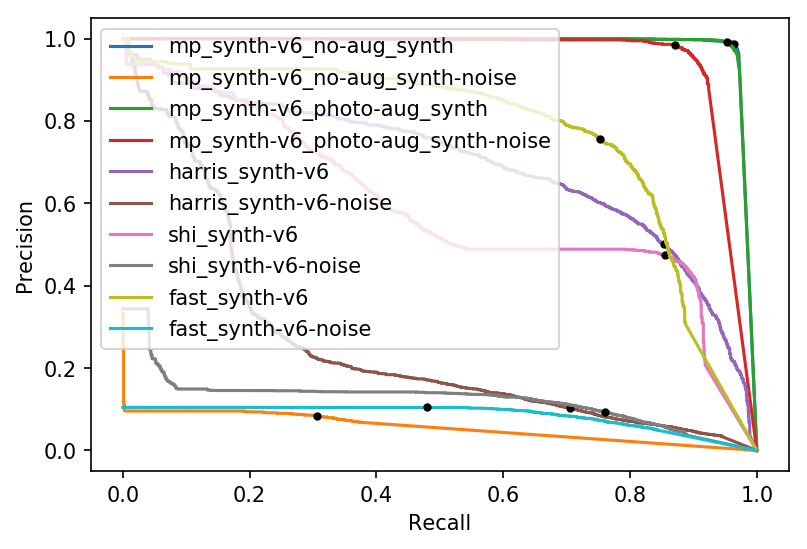

In [71]:
plt.figure(dpi=150)
for e, t in zip(experiments, confidence_thresholds):
    p, r, prob = ev.compute_pr(e, distance_thresh=4)
    plt.plot(r, p, label=e);
    
    mAP = ev.compute_mAP(p, r)
    print('> {}'.format(e))
    print('mAP: {}'.format(mAP))
    
    op_idx = np.max(np.where(prob > t))
    plt.plot(r[op_idx], p[op_idx], marker='o', color='k', markersize=3)
    
plt.legend(), plt.xlabel('Recall'), plt.ylabel('Precision');

# Localization Error

In [72]:
for e, t in zip(experiments, confidence_thresholds):
    error = ev.compute_loc_error(e, prob_thresh=t, distance_thresh=4)
    print('> {}: {}'.format(e, error))

> mp_synth-v6_no-aug_synth: 0.34199045256725474
> mp_synth-v6_no-aug_synth-noise: 1.6137386259345237
> mp_synth-v6_photo-aug_synth: 0.6124899907377503
> mp_synth-v6_photo-aug_synth-noise: 0.782935650949
> harris_synth-v6: 2.007475384206367
> harris_synth-v6-noise: 2.2026310722901923
> shi_synth-v6: 1.6038911210923914
> shi_synth-v6-noise: 1.9368198636434402
> fast_synth-v6: 2.0944419395742564
> fast_synth-v6-noise: 2.2023362860130486


# Visualization

In [68]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

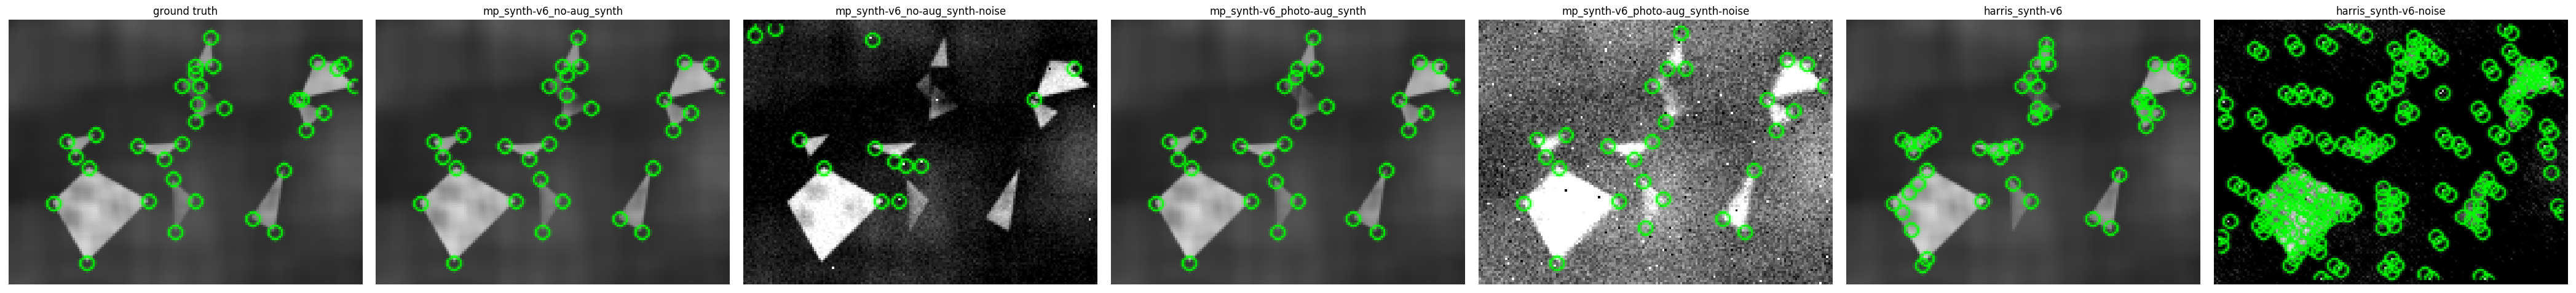

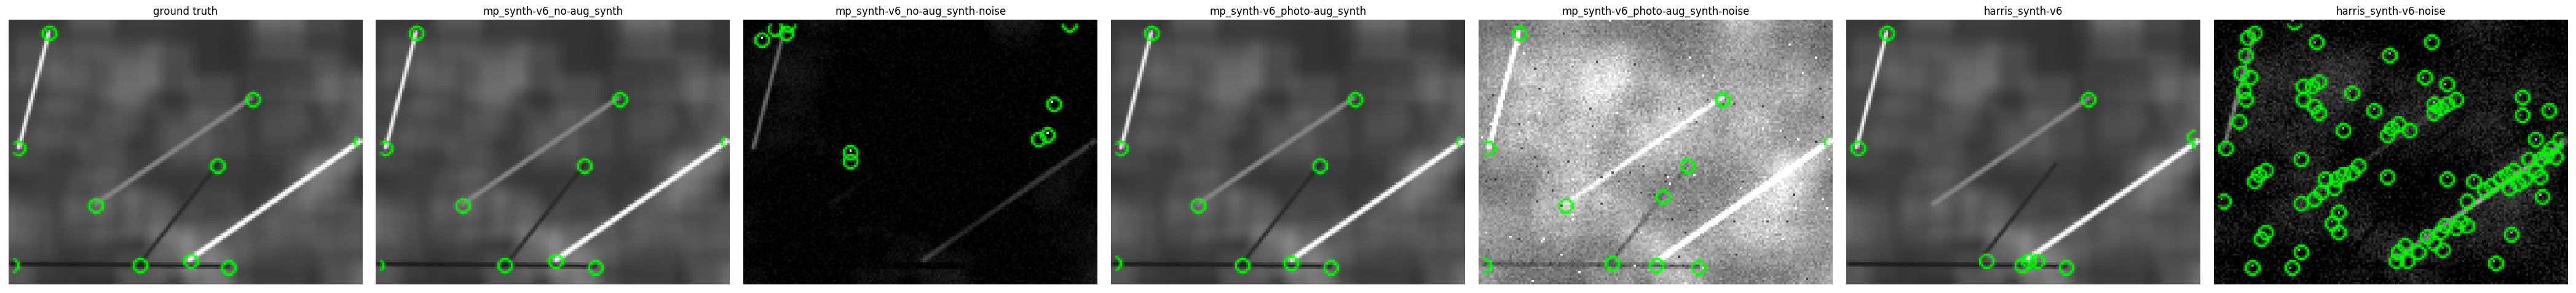

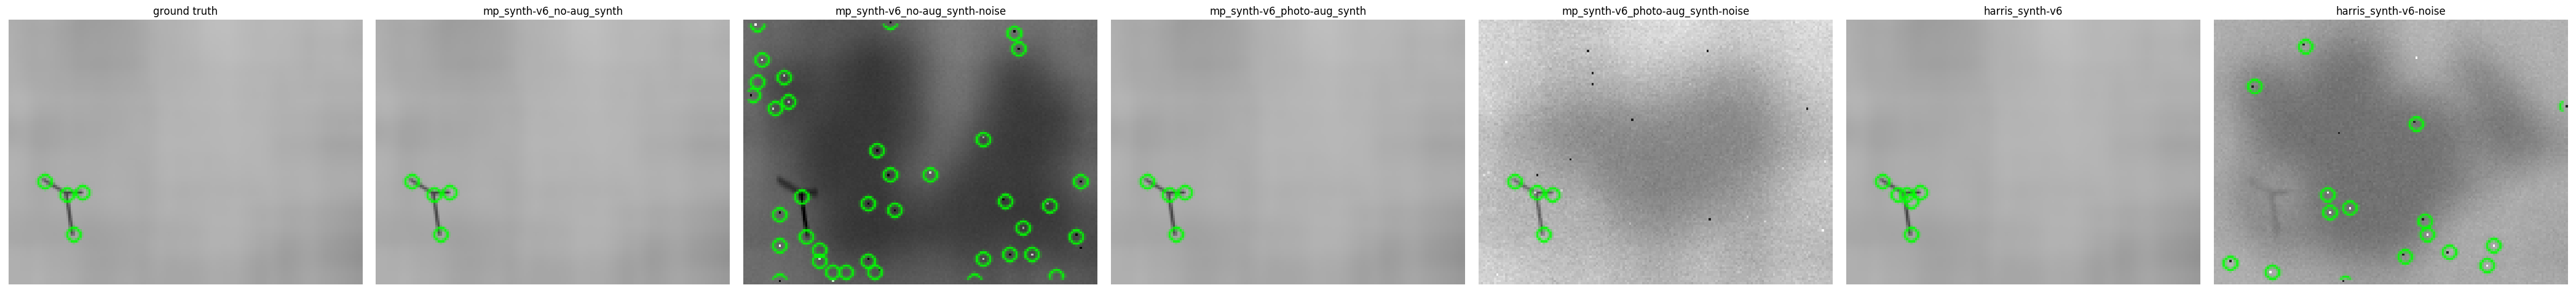

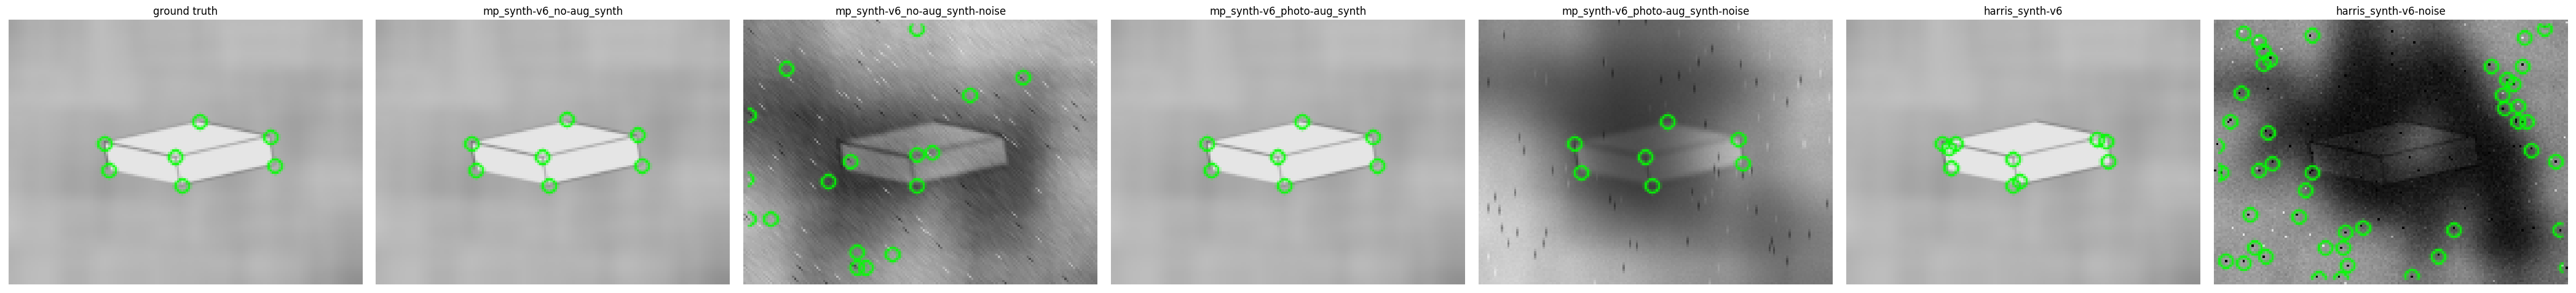

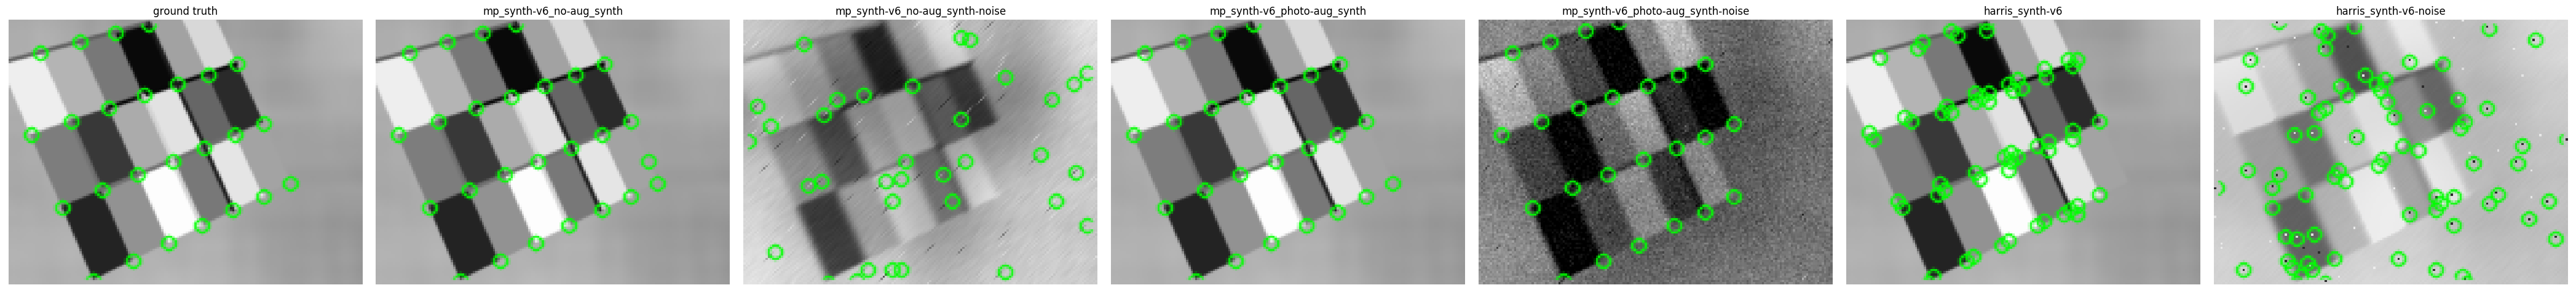

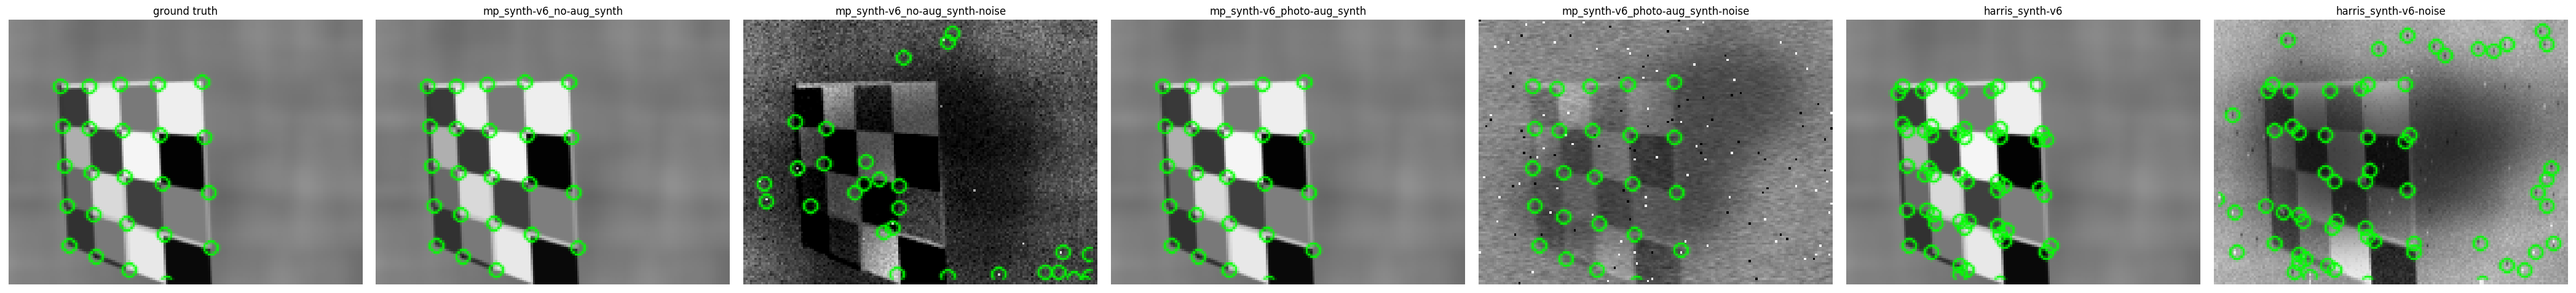

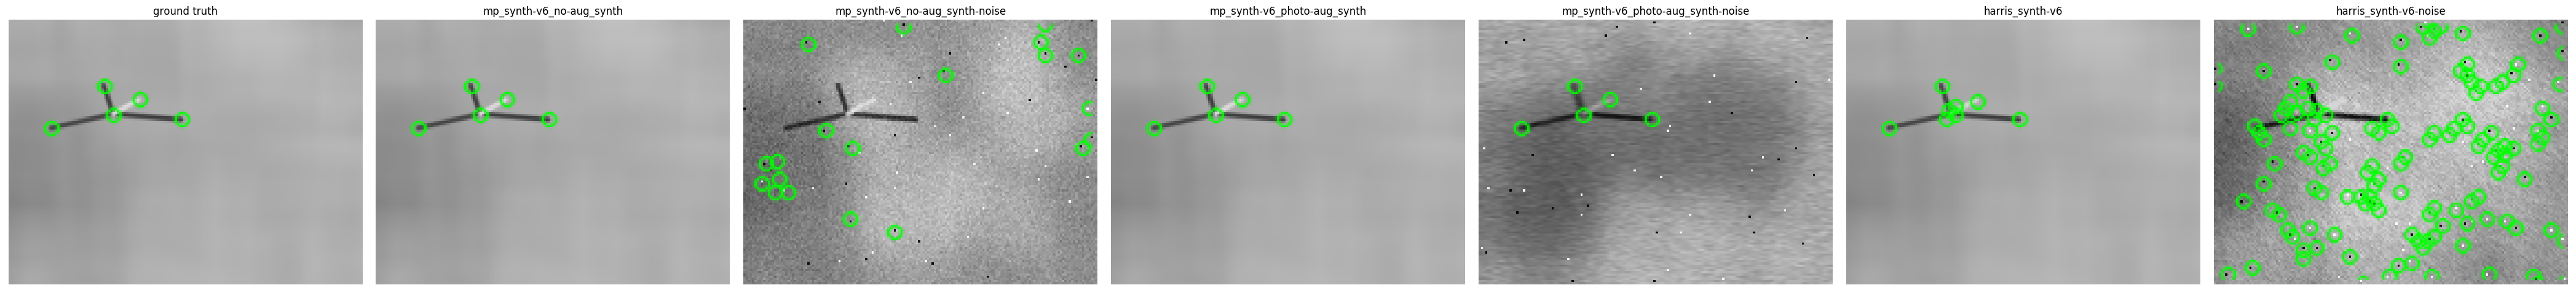

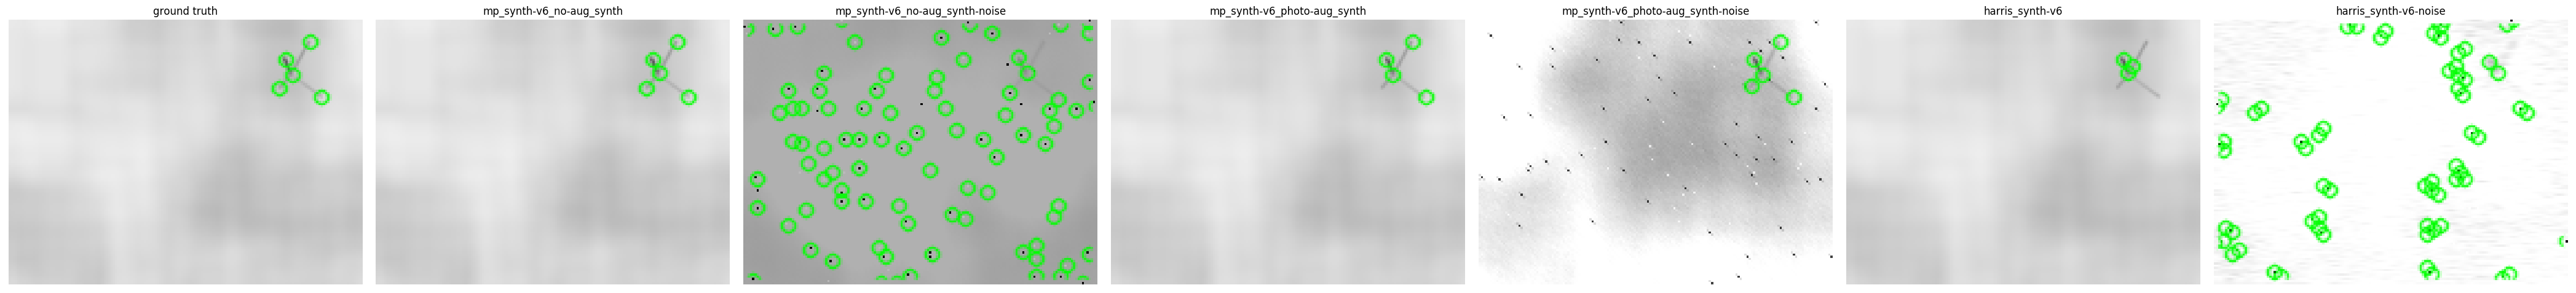

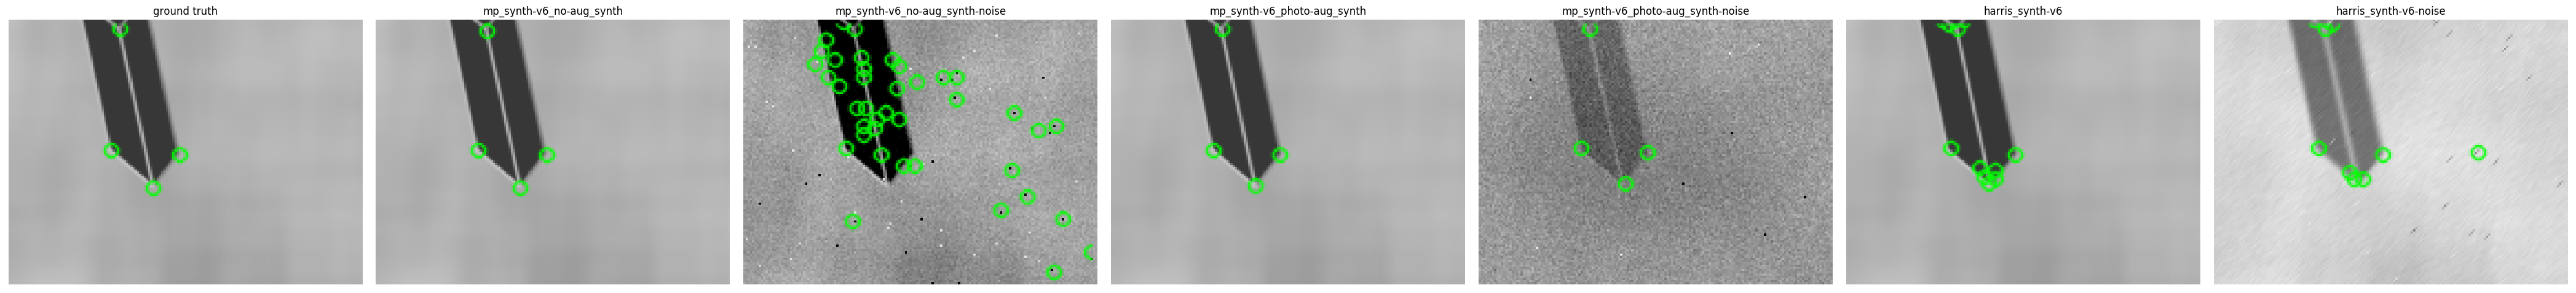

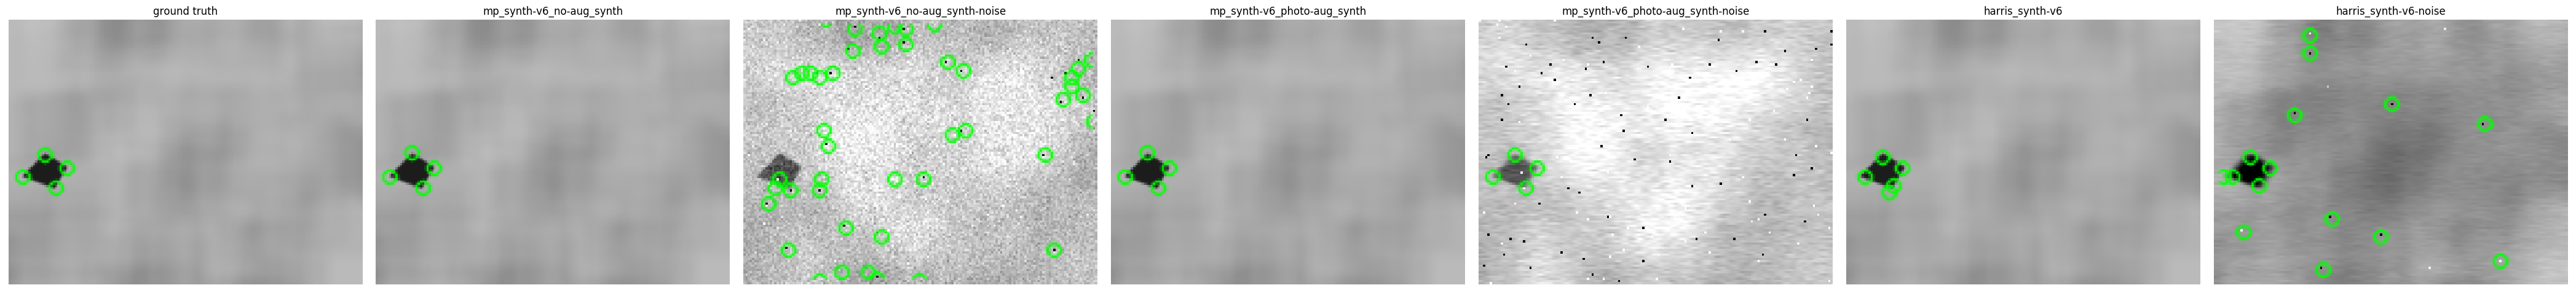

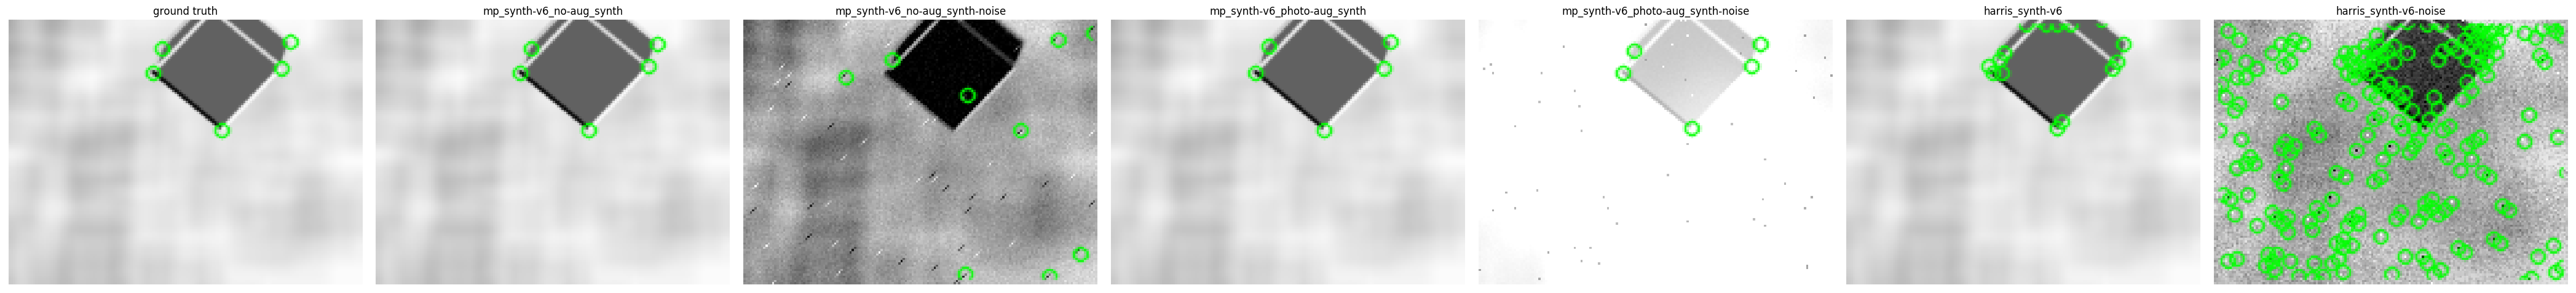

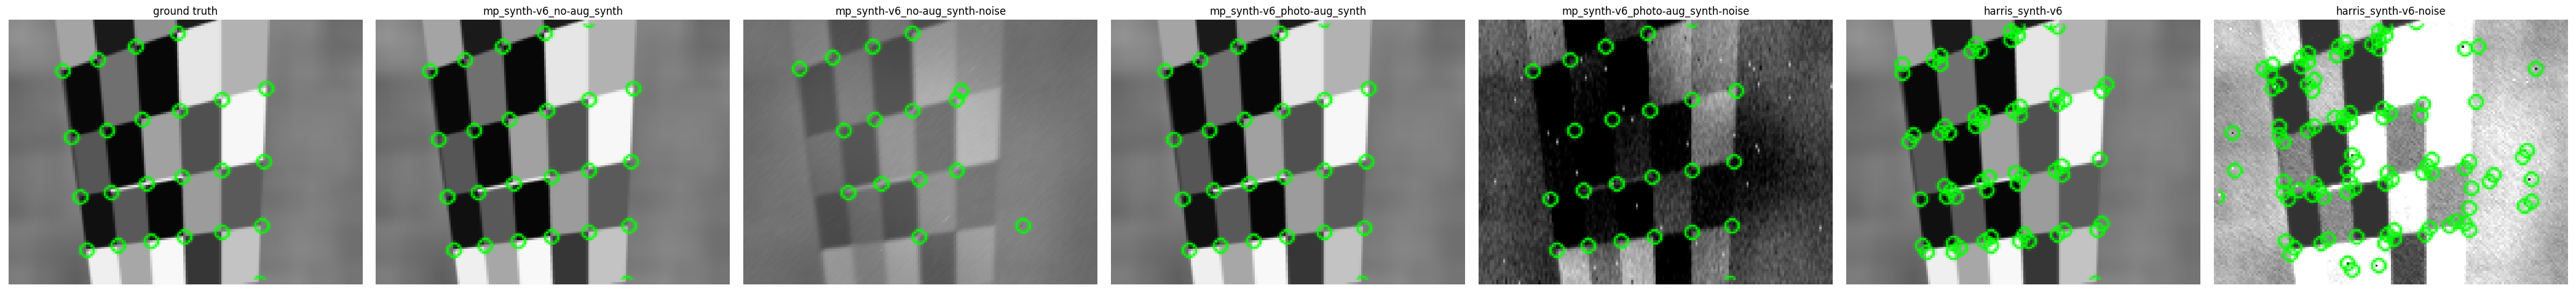

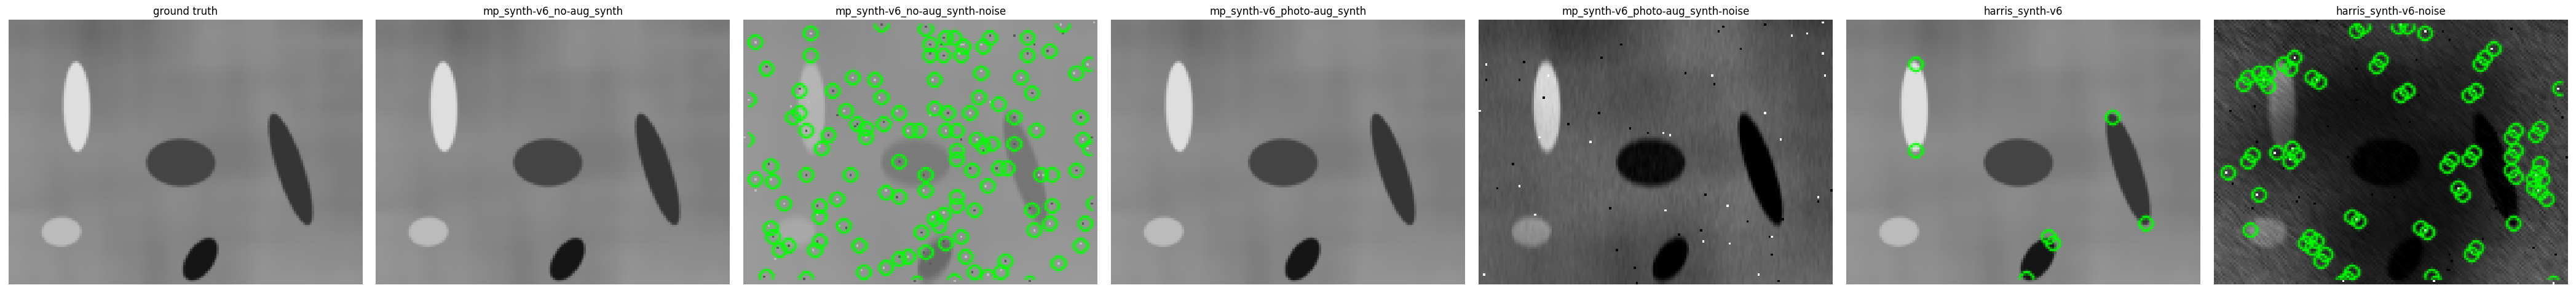

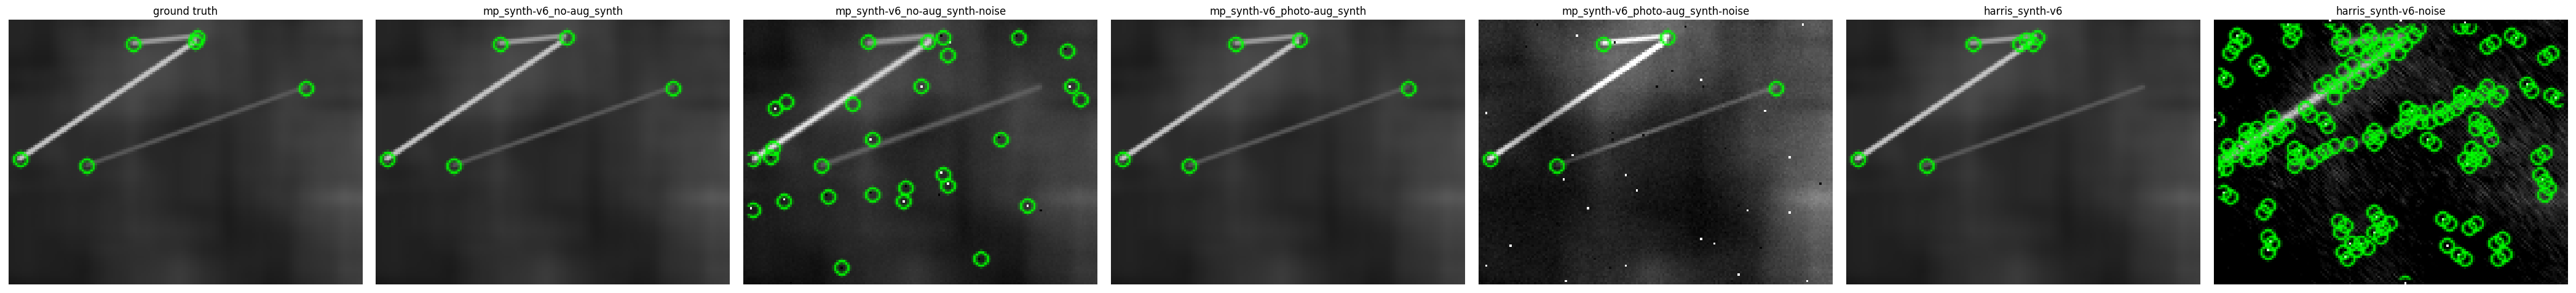

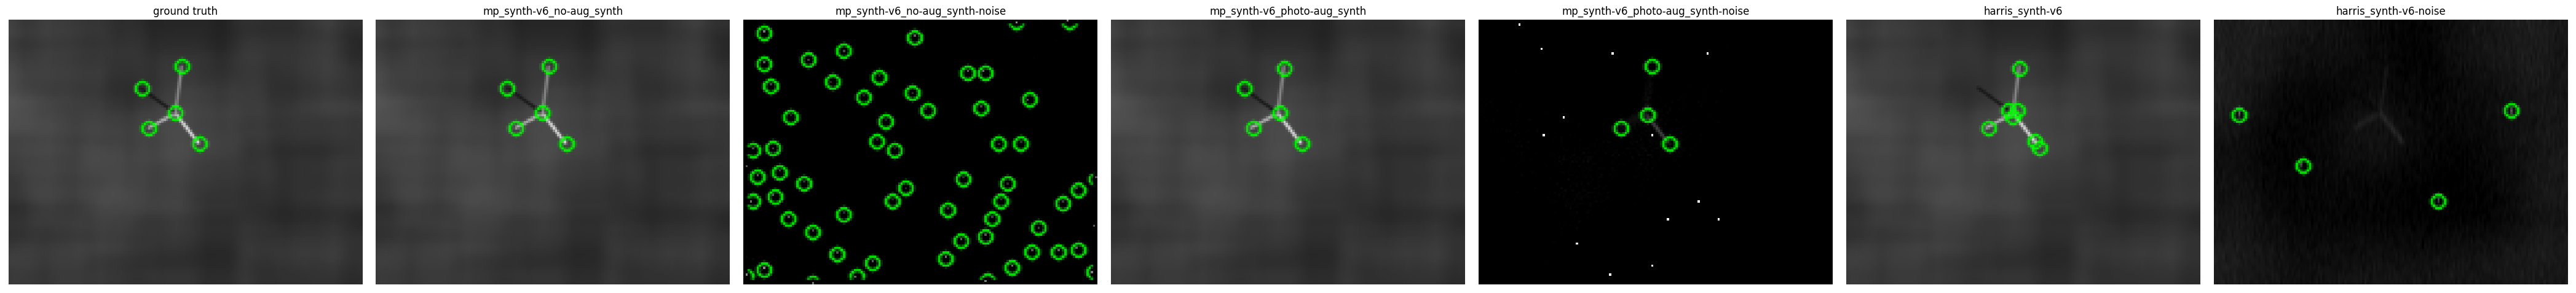

In [69]:
paths = [ev.get_paths(e) for e in experiments]
for i in range(15):
    images = []
    for j, (e, t) in enumerate(zip(experiments, confidence_thresholds)):
        data = np.load(paths[j][i])
        if e == experiments[0]:
            images.append(draw_keypoints(data['image'] * 255, np.where(data['keypoint_map']), (0, 255, 0)))
        images.append(draw_keypoints(data['image'] * 255, np.where(data['prob_nms'] > t), (0, 255, 0)))
    plot_imgs([im/255. for im in images], titles=['ground truth']+experiments)